In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from datetime import date,datetime,timedelta
import yahoo_fin.stock_info as si
from PIL import Image
import os
from yahooquery import Ticker
from reportlab.pdfgen.canvas import Canvas
from datetime import datetime
from yahoo_fin import stock_info 
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

import plotly
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objs as go
import ipywidgets
import notebook
import kaleido
from prophet import Prophet 


pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")
import datetime

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_2640/115182114.py:48: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
symbol=['AAPL','MSFT','TSLA','BAMI.MI','GOOG','META','DEZ.DE','ENI.MI','NVDA','BABA','TSM','AMZN','UBS','UCG.MI']

In [3]:
end = date.today()+timedelta(weeks=1)
start = end-timedelta(weeks=52)
stock_data={}
for stock in symbol:
    stock_data[stock]= yf.download(stock,start,end, auto_adjust=True,ignore_tz=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
end = date.today()+timedelta(weeks=1)
start = end-timedelta(weeks=60)
for stock in symbol:
    stock_data[stock]= yf.download(stock,start,end, auto_adjust=True,ignore_tz=True)
for stock in symbol:
    dictionary={}
    stock_data[stock]['historic_growth'] = stock_data[stock].Close.div(stock_data[stock].Close.loc[stock_data[stock].Close.first_valid_index()]).mul(100)
    stock_data[stock]['log_return'] = np.log(stock_data[stock].Close.div(stock_data[stock].Close.shift(1)))
    weeks = [g for n, g in stock_data[stock].groupby(pd.Grouper(freq='W'))]
    stocks_general_properties={}
for stock in symbol:
    dictionary={}
    stock_data[stock]['historic_growth'] = stock_data[stock].Close.div(stock_data[stock].Close.loc[stock_data[stock].Close.first_valid_index()]).mul(100)
    stock_data[stock]['log_return'] = np.log(stock_data[stock].Close.div(stock_data[stock].Close.shift(1)))
    weeks = [g for n, g in stock_data[stock].groupby(pd.Grouper(freq='W'))]
    for week in weeks:
        week_return=week.Close[-1] / week.Close[0]
        std = week['log_return'].std()
        volume_change=week.Volume[-1]/week.Volume[0]
        dictionary[week.iloc[:1].index.item()]=[stock,std,week_return,volume_change]
    stocks_general_properties[stock]=pd.DataFrame.from_dict(dictionary, orient='index',columns=['stock','std','week_return','volume_change'])
    stocks_general_properties[stock] = stocks_general_properties[stock].rename(columns = {'index':'month_year'})
    stocks_general_properties[stock]['week_return_future'] =stocks_general_properties[stock]['week_return'].shift(-1)
    stocks_general_properties[stock]['position']=stocks_general_properties[stock]['week_return_future'].apply(lambda x: 1 if x>1 else 0)
stocks_global=pd.DataFrame()
for stock in symbol:
    stocks_global=pd.concat([stocks_global,stocks_general_properties[stock]])
stocks_global=stocks_global.dropna()
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    MLPClassifier(alpha=1, max_iter=10000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]
display(stocks_global)
x_cols = ['std', 'week_return','volume_change']
X = stocks_global.loc[:, x_cols]
y = stocks_global.position
for name, clf in zip(names, classifiers):
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X, y)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_2640/275246768.py:19: RuntimeWarning: invalid value encountered in long_scalars
  volume_change=week.Volume[-1]/week.Volume[0]


stock    std  week_return  volume_change  week_return_future  \
2022-02-14    AAPL 0.0163       0.9906         0.9604              1.0032   
2022-02-22    AAPL 0.0216       1.0032         1.0089              0.9882   
2022-02-28    AAPL 0.0149       0.9882         0.8809              0.9713   
2022-03-07    AAPL 0.0259       0.9713         1.0057              1.0887   
2022-03-14    AAPL 0.0234       1.0887         1.1359              1.0565   
...            ...    ...          ...            ...                 ...   
2023-02-20  UCG.MI 0.0196       0.9598         2.1050              0.9927   
2023-02-27  UCG.MI 0.0273       0.9927         0.5418              0.9659   
2023-03-06  UCG.MI 0.0208       0.9659         2.6945              0.9384   
2023-03-13  UCG.MI 0.0646       0.9384         0.8525              0.9966   
2023-03-20  UCG.MI 0.0424       0.9966         0.7593              1.0596   

            position  
2022-02-14         1  
2022-02-22         0  
2022-02-28         0  
2022-03-07         1  
2022-03-14         1  
...              ...  
2023-02-20         0  
2023-02-27         0  
2023-03-06         0  
2023-03-13         0  
2023-03-20         1  

[810 rows x 6 columns]

In [5]:
def rsi(data):
    data.Close.diff()
    data["U"] = np.where(data.Close.diff() > 0, data.Close.diff(), 0)
    data["D"] = np.where(data.Close.diff() < 0, -data.Close.diff(), 0)
    periods = 14
    data["MA_U"] = data.U.rolling(periods).mean()
    data["MA_D"] = data.D.rolling(periods).mean()
    data["RSI"] = data.MA_U / (data.MA_U + data.MA_D) * 100
    return data
def bollinger_bands(data):
    SMA = 30
    dev = 2
    data["SMA"] = data["Close"].rolling(SMA).mean()
    data["Lower"] = data["SMA"] - data["Close"].rolling(SMA).std() * dev
    data["Upper"] = data["SMA"] + data["Close"].rolling(SMA).std() * dev # Upper Band -2 Std Dev
    return data
def ema(data):
    ema_s = 12 # EMA Short
    ema_l = 26 # EMA Long
    data["EMA_S"] = data.Close.ewm(span = ema_s, min_periods = ema_s).mean() 
    data["EMA_L"] = data.Close.ewm(span = ema_l, min_periods = ema_l).mean() 
    return data
def stocastic_oscillator(data):
    periods = 14
    data["roll_low"] = data.Low.rolling(periods).min()
    data["roll_high"] = data.High.rolling(periods).max()
    return data

def compute_prediction_next_week(stocktopredict):

    end = date.today()+timedelta(weeks=1)+timedelta(days=1)
    start = end-timedelta(weeks=60)
    data=yf.download(stock,start,end, auto_adjust=True,ignore_tz=True)
    data['log_return'] = np.log(data.Close.div(data.Close.shift(1)))
    dictionary={}
    weeks = [g for n, g in data.groupby(pd.Grouper(freq='W'))]
    for week in weeks:
        week_return=week.Close[-1] / week.Close[0]
        std = week['log_return'].std()
        volume_change=week.Volume[-1]/week.Volume[0]
        dictionary[week.iloc[:1].index.item()]=[stock,std,week_return,volume_change]
        data=pd.DataFrame.from_dict(dictionary, orient='index',columns=['stock','std','week_return','volume_change'])
    data = data.rename(columns = {'index':'month_year'})
    data['week_return_future'] =data['week_return'].shift(-1)
    data['position']=data['week_return_future'].apply(lambda x: 1 if x>1 else 0)  
    data = data.tail(-1).copy()
    x_cols = ['std', 'week_return','volume_change']
    X = data.loc[:, x_cols]
    y = data.position
    X_to_pred=data.tail(1).loc[:, x_cols].head(1)
    print(X_to_pred)
    sum_y=0   
    for name, clf in zip(names, classifiers):
        y_pred = clf.predict(X_to_pred).item()
        sum_y=sum_y+y_pred          
    if sum_y==10:
        return "buy"
    if sum_y==0:
        return "sell"
    else:
        return "hold"
    
def close_and_volume_price(stock):
    end = date.today()+timedelta(weeks=1)
    start = date.today()-timedelta(weeks=2)
    data=yf.download(stock,start,end, auto_adjust=True,ignore_tz=True)
    plt.rc('figure', figsize=(8,5))
    fig, axes = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
    fig.tight_layout(pad=3)
    Date = data.index.strftime('%d-%m')
    close = data['Close']
    vol = data['Volume']    
    plot_price = axes[0]
    plot_price.set_title('Close price ultime 2 settimane')
    plot_price.plot(Date, close,linewidth=2, label='Price')
    plot_vol = axes[1]
    plot_vol.set_title('Volume ultime 2 settimane')
    plot_vol.bar(Date, vol, width=1, color='darkgrey')
    plt.savefig('closeandvolume.png')

def prophet_plot(stock):
    end = date.today()+timedelta(weeks=1)
    start = end-timedelta(weeks=52*1)
    data= yf.download(stock,start,end, auto_adjust=True,ignore_tz=True).reset_index()
    data[['ds','y']] = data[['Date','Close']]  
    df= pd.DataFrame()
    df['ds']= data[['Date']]  
    df['y']= data[['Close']]  
    fbp = Prophet(daily_seasonality = True) 
    fbp.fit(df)
    fut = fbp.make_future_dataframe(periods=365) 
    forecast = fbp.predict(fut)
    fig = go.Figure()
    fig=plot_plotly(fbp, forecast)
    fig.write_image("prophet.png")
    today=date.today()
    one_month_after=date.today()+timedelta(weeks=4)
    lower=forecast['yhat_lower'][forecast['ds'].dt.date > end].head(1).item()
    upper=forecast['yhat_upper'][forecast['ds'].dt.date > end].head(1).item()
    medium=forecast['yhat'][forecast['ds'].dt.date > end].head(1).item()
    today_yhat = forecast['yhat'][forecast['ds'].dt.date > today].head(1).item()
    upper_multiplier= upper/today_yhat
    lower_multiplier= lower/today_yhat
    prediction_multiplier=medium/today_yhat
    lower_limit= data.tail(1).Close.item()*lower_multiplier
    upper_limit= data.tail(1).Close.item()*upper_multiplier
    prediction=data.tail(1).Close.item()*prediction_multiplier
    
    string1="Next week prevision: "+ str(round(prediction,2))+" Range: "+ str(round(lower_limit,2))+" - "+ str(round(upper_limit,2))
    lower=forecast['yhat_lower'][forecast['ds'].dt.date > one_month_after].head(1).item()
    upper=forecast['yhat_upper'][forecast['ds'].dt.date > one_month_after].head(1).item()
    medium=forecast['yhat'][forecast['ds'].dt.date > one_month_after].head(1).item()
    today_yhat = forecast['yhat'][forecast['ds'].dt.date > today].head(1).item()
    upper_multiplier= upper/today_yhat
    lower_multiplier= lower/today_yhat
    prediction_multiplier=medium/today_yhat
    lower_limit= data.tail(1).Close.item()*lower_multiplier
    upper_limit= data.tail(1).Close.item()*upper_multiplier
    prediction=data.tail(1).Close.item()*prediction_multiplier
    string2="Next month prevision: "+ str(round(prediction,2))+" Range: "+ str(round(lower_limit,2))+" - "+ str(round(upper_limit,2))
    
    return [string1,string2]

def find_maximum(data):
    one_month_ago = date.today()-timedelta(weeks=4)
    to_search=data[data.index.date>one_month_ago]
    one_month_maximum=to_search.loc[to_search['Close'].idxmax()].Close
    argmax=to_search['Close'].argmax()
    date_max_month=to_search.iloc[[argmax]].index.item()
    date_max_month=date_max_month.strftime('%Y-%m-%d')
    print(date_max_month)
    one_year_ago = date.today()-timedelta(weeks=52)
    to_search=data[data.index.date>one_year_ago]
    one_year_maximum=to_search.loc[to_search['Close'].idxmax()].Close
    argmax=to_search['Close'].argmax()
    date_max_year=to_search.iloc[[argmax]].index.item()
    date_max_year=date_max_year.strftime('%Y-%m-%d')
    return "Last month maximum: "+ str(round(one_month_maximum,2))+" date: "+date_max_month+" Last year maximum: "+str(round(one_year_maximum,2))+" date: "+date_max_year

    


In [6]:
end = date.today()+timedelta(weeks=1)
start = end-timedelta(weeks=52)
stock_data={}
for stock in symbol:
    stock_data[stock]= yf.download(stock,start,end, auto_adjust=True,ignore_tz=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL
[*********************100%***********************]  1 of 1 completed
              std  week_return  volume_change
2023-03-27 0.0135       1.0418         1.2181


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but GaussianProcessClassifier was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature 

[*********************100%***********************]  1 of 1 completed
2023-03-31
[*********************100%***********************]  1 of 1 completed

23:34:08 - cmdstanpy - INFO - Chain [1] start processing
23:34:08 - cmdstanpy - INFO - Chain [1] done processing



[*********************100%***********************]  1 of 1 completed

23:34:09 - cmdstanpy - INFO - Chain [1] start processing
23:34:09 - cmdstanpy - INFO - Chain [1] done processing



MSFT
[*********************100%***********************]  1 of 1 completed
              std  week_return  volume_change
2023-03-27 0.0144       1.0431         1.2190
[*********************100%***********************]  1 of 1 completed


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but GaussianProcessClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/l

2023-03-31
[*********************100%***********************]  1 of 1 completed


23:34:11 - cmdstanpy - INFO - Chain [1] start processing
23:34:11 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%***********************]  1 of 1 completed

23:34:11 - cmdstanpy - INFO - Chain [1] start processing
23:34:11 - cmdstanpy - INFO - Chain [1] done processing



TSLA
[*********************100%***********************]  1 of 1 completed
              std  week_return  volume_change
2023-03-27 0.0278       1.0816         1.4007
[*********************100%***********************]  1 of 1 completed


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but GaussianProcessClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/l

2023-03-31
[*********************100%***********************]  1 of 1 completed

23:34:13 - cmdstanpy - INFO - Chain [1] start processing


23:34:13 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%***********************]  1 of 1 completed

23:34:13 - cmdstanpy - INFO - Chain [1] start processing
23:34:13 - cmdstanpy - INFO - Chain [1] done processing



BAMI.MI
[*********************100%***********************]  1 of 1 completed
              std  week_return  volume_change
2023-03-27 0.0179       1.0486         1.1690
[*********************100%***********************]  1 of 1 completed


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but GaussianProcessClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/l

2023-03-08
[*********************100%***********************]  1 of 1 completed

23:34:15 - cmdstanpy - INFO - Chain [1] start processing
23:34:15 - cmdstanpy - INFO - Chain [1] done processing



[*********************100%***********************]  1 of 1 completed

23:34:15 - cmdstanpy - INFO - Chain [1] start processing
23:34:15 - cmdstanpy - INFO - Chain [1] done processing



GOOG
[*********************100%***********************]  1 of 1 completed
              std  week_return  volume_change
2023-03-27 0.0210       1.0091         1.0220
[*********************100%***********************]  1 of 1 completed


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but GaussianProcessClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/l

2023-03-23
[*********************100%***********************]  1 of 1 completed

23:34:17 - cmdstanpy - INFO - Chain [1] start processing


23:34:17 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%***********************]  1 of 1 completed

23:34:17 - cmdstanpy - INFO - Chain [1] start processing
23:34:17 - cmdstanpy - INFO - Chain [1] done processing



META
[*********************100%***********************]  1 of 1 completed
              std  week_return  volume_change
2023-03-27 0.0177       1.0449         1.3612
[*********************100%***********************]  1 of 1 completed


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but GaussianProcessClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/l

2023-03-31
[*********************100%***********************]  1 of 1 completed

23:34:19 - cmdstanpy - INFO - Chain [1] start processing
23:34:19 - cmdstanpy - INFO - Chain [1] done processing



[*********************100%***********************]  1 of 1 completed

23:34:19 - cmdstanpy - INFO - Chain [1] start processing
23:34:19 - cmdstanpy - INFO - Chain [1] done processing



DEZ.DE
[*********************100%***********************]  1 of 1 completed
              std  week_return  volume_change
2023-03-27 0.0125       1.0464         1.7392
[*********************100%***********************]  1 of 1 completed


/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_2640/3305470972.py:40: RuntimeWarning:

invalid value encountered in long_scalars

/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_2640/3305470972.py:40: RuntimeWarning:

invalid value encountered in long_scalars

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but GaussianProcessClassifier

2023-03-06
[*********************100%***********************]  1 of 1 completed

23:34:21 - cmdstanpy - INFO - Chain [1] start processing
23:34:21 - cmdstanpy - INFO - Chain [1] done processing



[*********************100%***********************]  1 of 1 completed

23:34:21 - cmdstanpy - INFO - Chain [1] start processing
23:34:21 - cmdstanpy - INFO - Chain [1] done processing



ENI.MI
[*********************100%***********************]  1 of 1 completed
              std  week_return  volume_change
2023-03-27 0.0068       1.0486         0.8521
[*********************100%***********************]  1 of 1 completed


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but GaussianProcessClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/l

2023-03-06
[*********************100%***********************]  1 of 1 completed

23:34:23 - cmdstanpy - INFO - Chain [1] start processing
23:34:23 - cmdstanpy - INFO - Chain [1] done processing



[*********************100%***********************]  1 of 1 completed

23:34:23 - cmdstanpy - INFO - Chain [1] start processing
23:34:23 - cmdstanpy - INFO - Chain [1] done processing



NVDA
[*********************100%***********************]  1 of 1 completed
              std  week_return  volume_change
2023-03-27 0.0134       1.0470         1.1718
[*********************100%***********************]  1 of 1 completed


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but GaussianProcessClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/l

2023-03-31
[*********************100%***********************]  1 of 1 completed


23:34:25 - cmdstanpy - INFO - Chain [1] start processing
23:34:25 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%***********************]  1 of 1 completed

23:34:25 - cmdstanpy - INFO - Chain [1] start processing
23:34:25 - cmdstanpy - INFO - Chain [1] done processing



BABA
[*********************100%***********************]  1 of 1 completed
              std  week_return  volume_change
2023-03-27 0.0594       1.1865         1.5156
[*********************100%***********************]  1 of 1 completed


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but GaussianProcessClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/l

2023-03-30
[*********************100%***********************]  1 of 1 completed


23:34:27 - cmdstanpy - INFO - Chain [1] start processing
23:34:27 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%***********************]  1 of 1 completed

23:34:27 - cmdstanpy - INFO - Chain [1] start processing
23:34:27 - cmdstanpy - INFO - Chain [1] done processing



TSM
[*********************100%***********************]  1 of 1 completed
              std  week_return  volume_change
2023-03-27 0.0161       1.0260         0.8325
[*********************100%***********************]  1 of 1 completed


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but GaussianProcessClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/l

2023-03-23
[*********************100%***********************]  1 of 1 completed

23:34:29 - cmdstanpy - INFO - Chain [1] start processing
23:34:29 - cmdstanpy - INFO - Chain [1] done processing



[*********************100%***********************]  1 of 1 completed

23:34:29 - cmdstanpy - INFO - Chain [1] start processing
23:34:29 - cmdstanpy - INFO - Chain [1] done processing



AMZN
[*********************100%***********************]  1 of 1 completed
              std  week_return  volume_change
2023-03-27 0.0152       1.0535         1.1501
[*********************100%***********************]  1 of 1 completed


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but GaussianProcessClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/l

2023-03-31
[*********************100%***********************]  1 of 1 completed

23:34:31 - cmdstanpy - INFO - Chain [1] start processing


23:34:31 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%***********************]  1 of 1 completed

23:34:31 - cmdstanpy - INFO - Chain [1] start processing
23:34:31 - cmdstanpy - INFO - Chain [1] done processing



UBS
[*********************100%***********************]  1 of 1 completed
              std  week_return  volume_change
2023-03-27 0.0196       1.1000         0.9448
[*********************100%***********************]  1 of 1 completed


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but GaussianProcessClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/l

2023-03-06
[*********************100%***********************]  1 of 1 completed

23:34:33 - cmdstanpy - INFO - Chain [1] start processing
23:34:33 - cmdstanpy - INFO - Chain [1] done processing



[*********************100%***********************]  1 of 1 completed

23:34:33 - cmdstanpy - INFO - Chain [1] start processing
23:34:33 - cmdstanpy - INFO - Chain [1] done processing



UCG.MI
[*********************100%***********************]  1 of 1 completed
              std  week_return  volume_change
2023-03-27 0.0173       1.0596         0.9435
[*********************100%***********************]  1 of 1 completed


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but GaussianProcessClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/l

2023-03-08
[*********************100%***********************]  1 of 1 completed

23:34:35 - cmdstanpy - INFO - Chain [1] start processing
23:34:35 - cmdstanpy - INFO - Chain [1] done processing



[*********************100%***********************]  1 of 1 completed

23:34:35 - cmdstanpy - INFO - Chain [1] start processing
23:34:36 - cmdstanpy - INFO - Chain [1] done processing


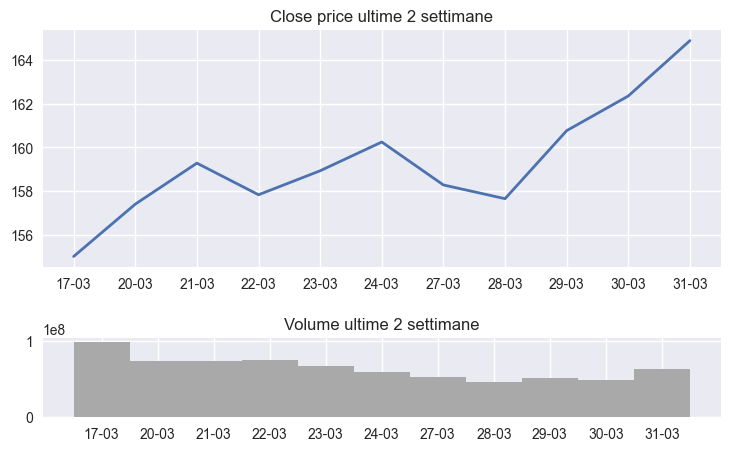

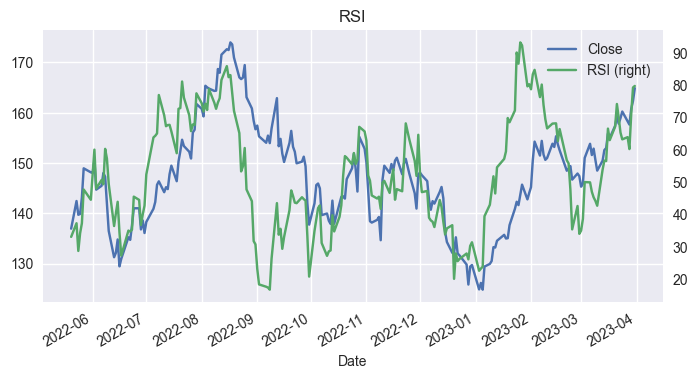

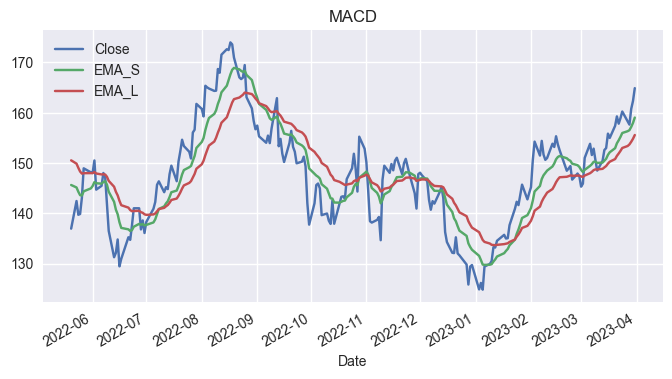

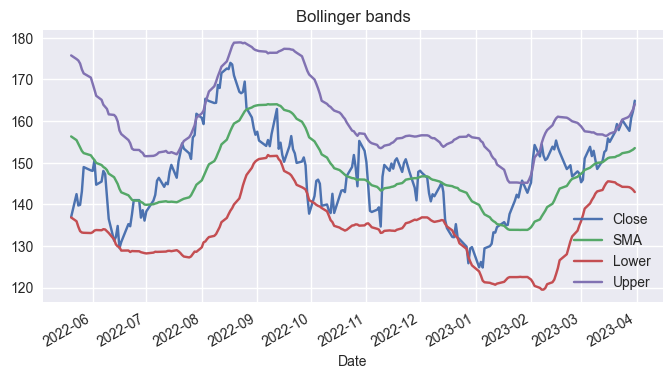

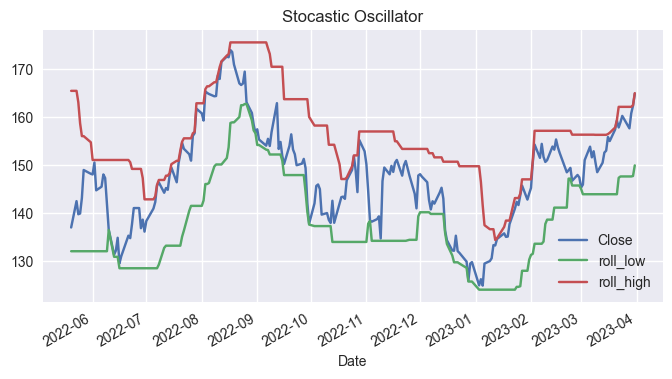

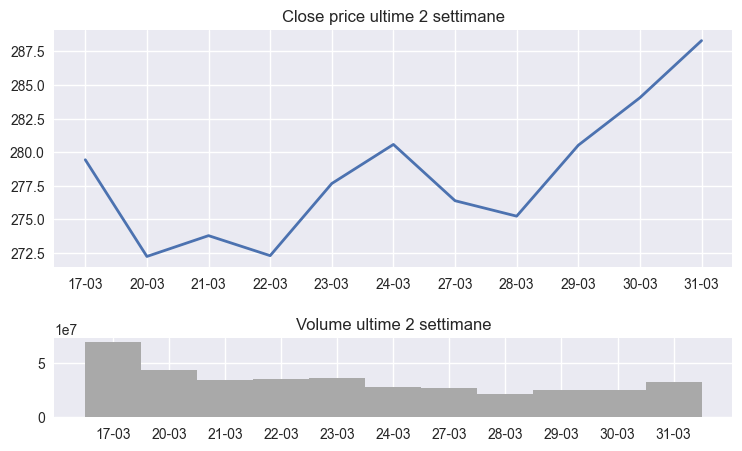

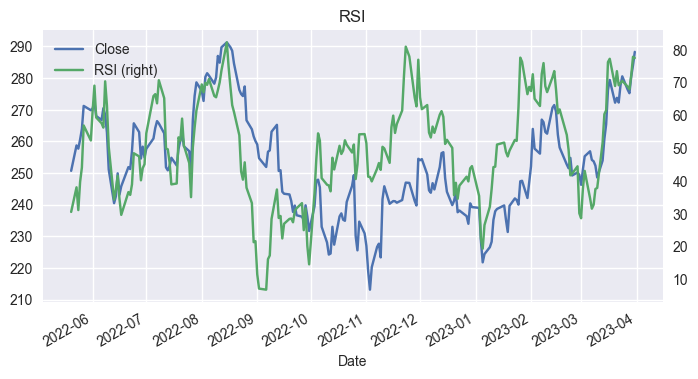

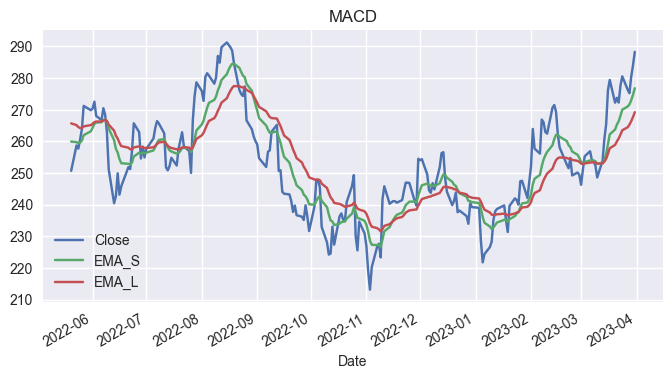

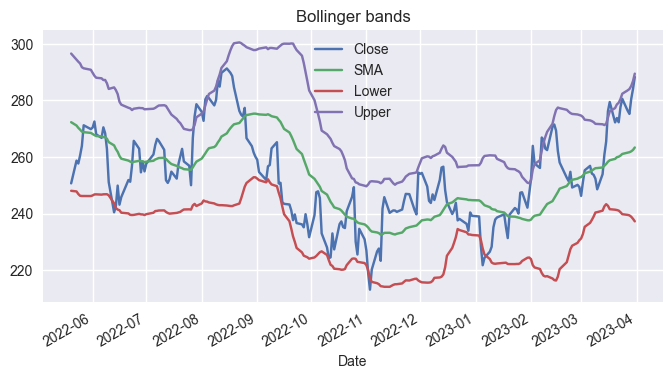

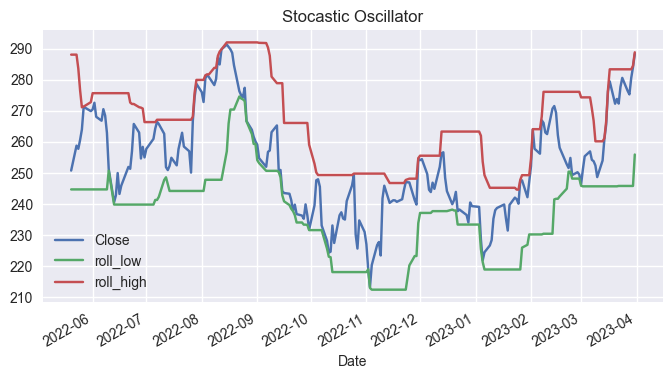

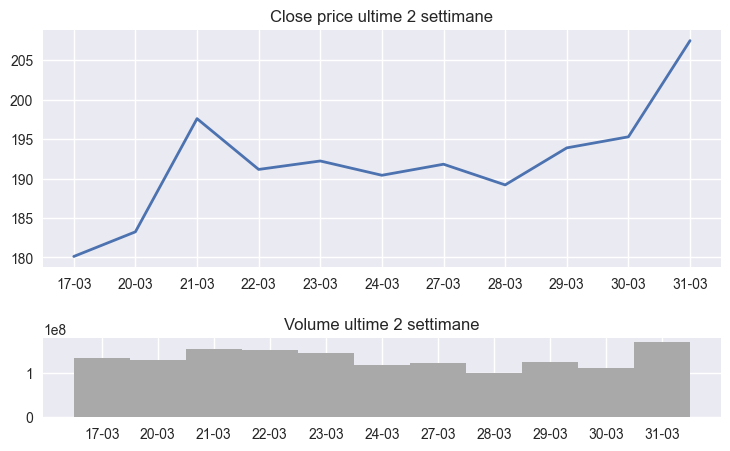

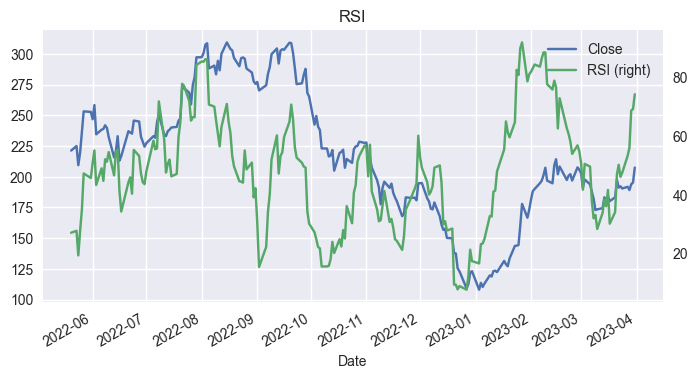

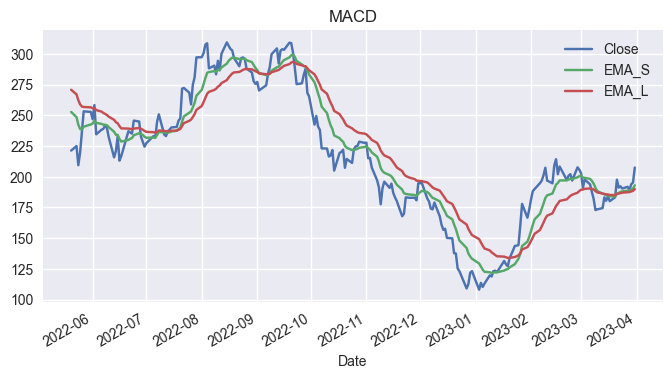

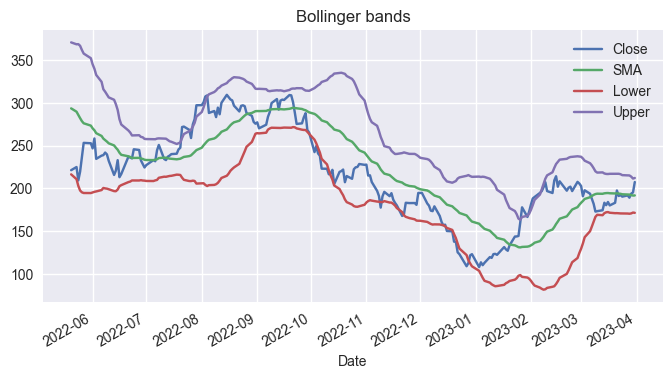

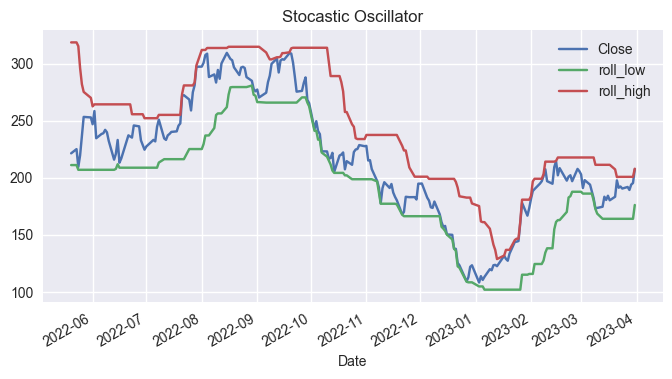

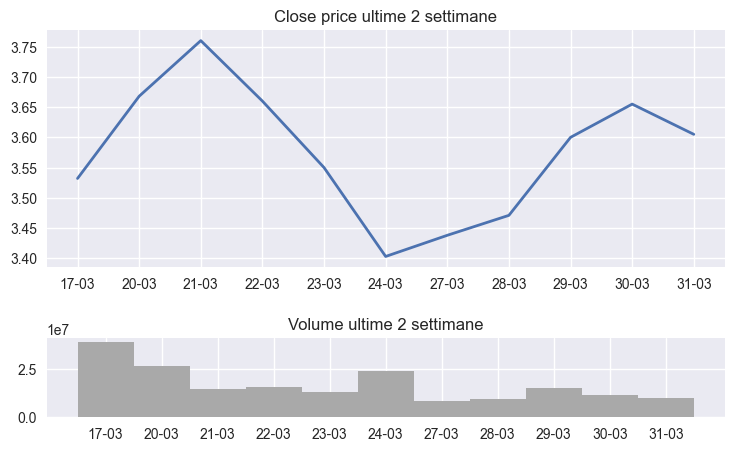

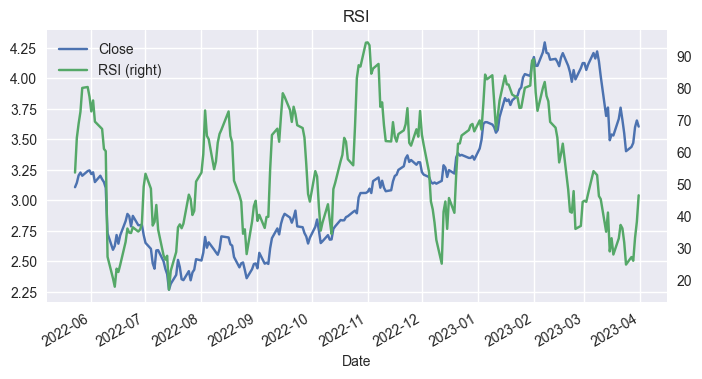

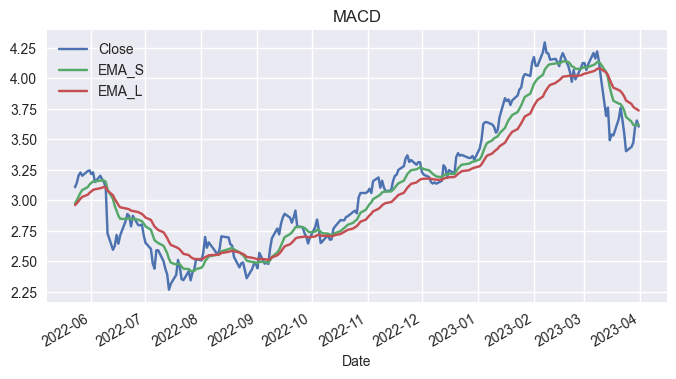

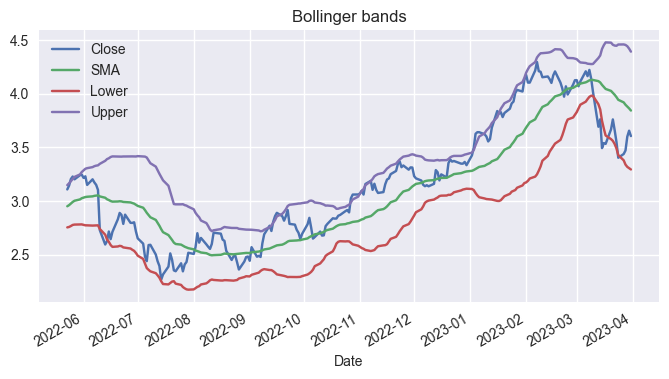

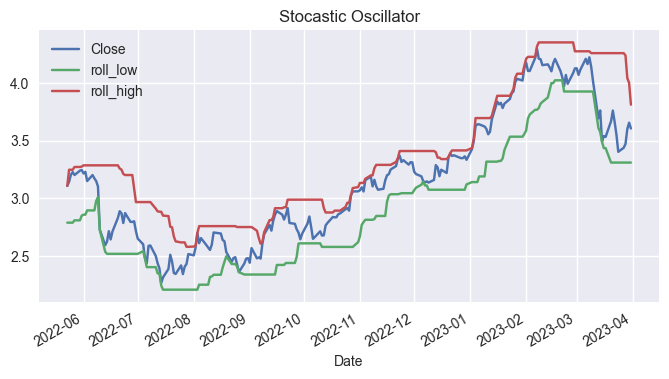

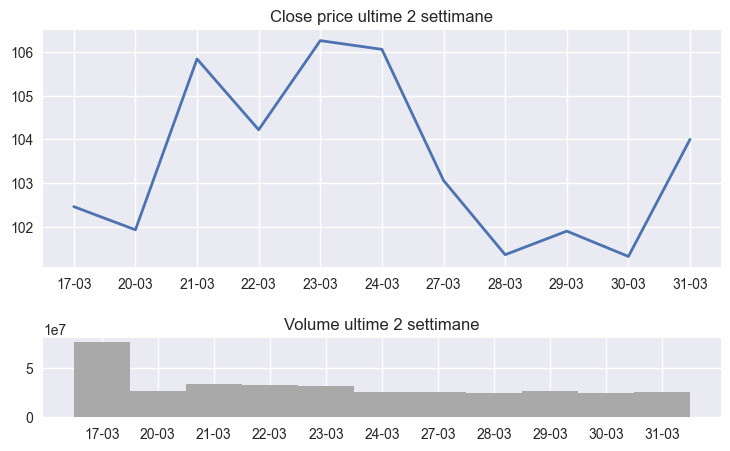

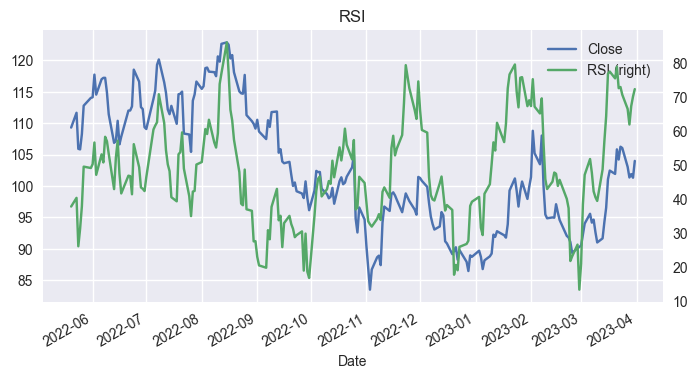

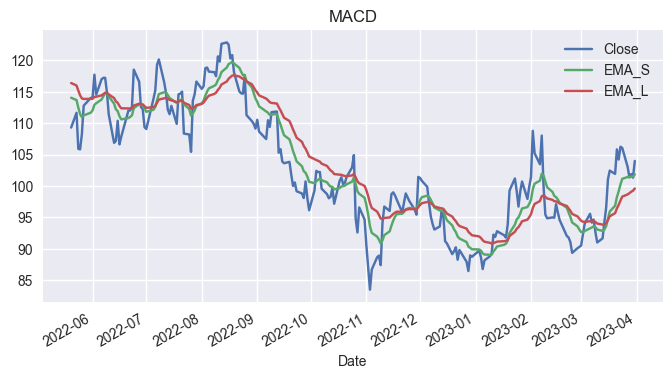

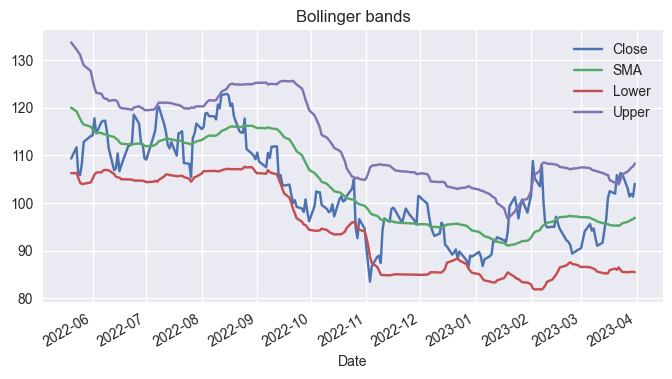

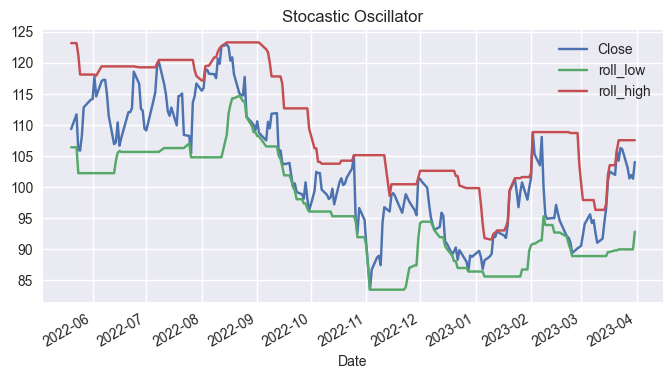

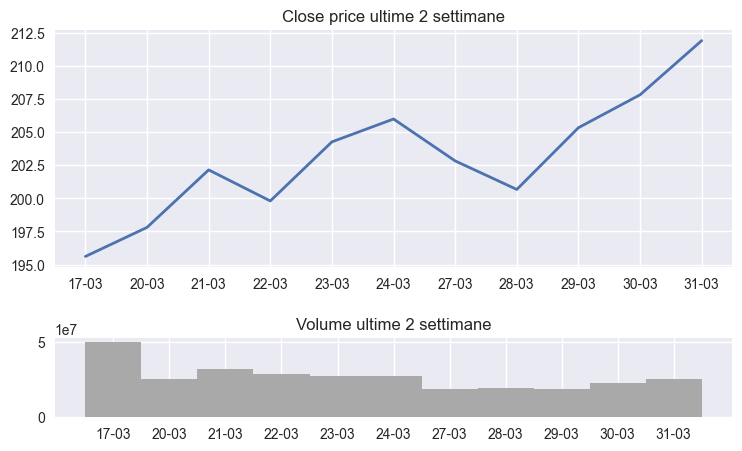

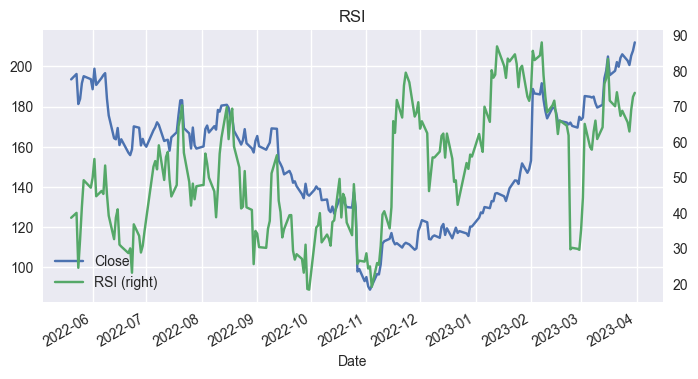

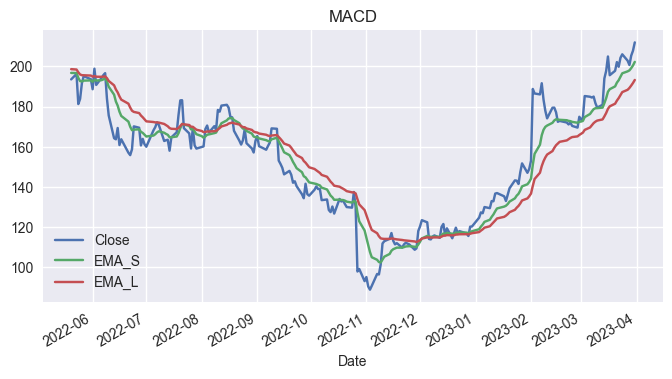

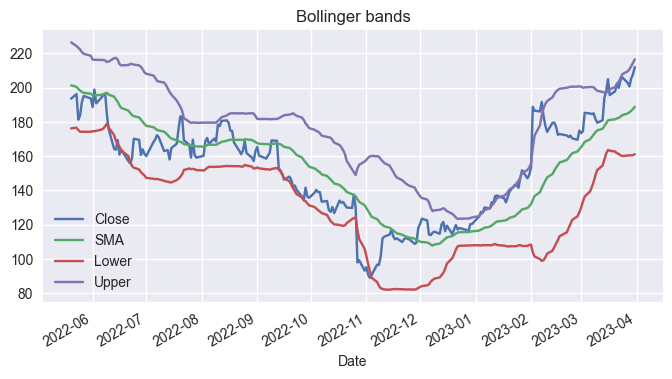

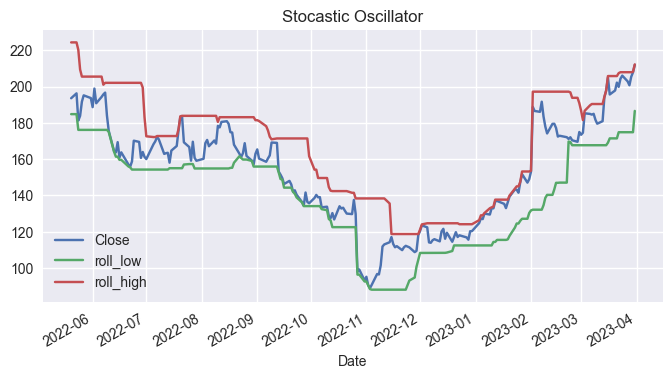

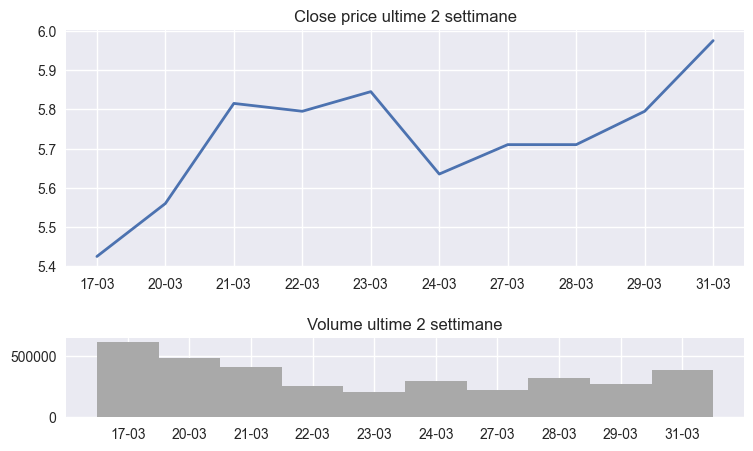

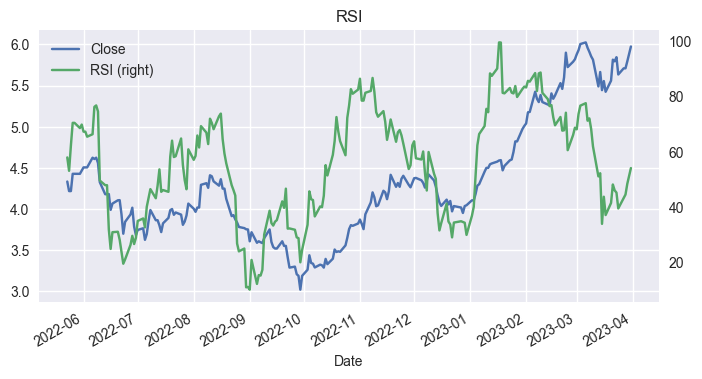

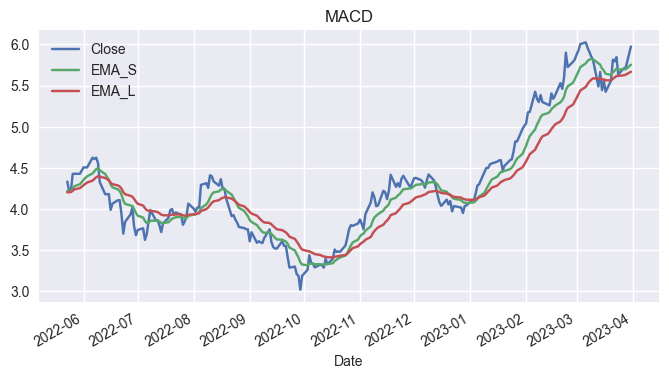

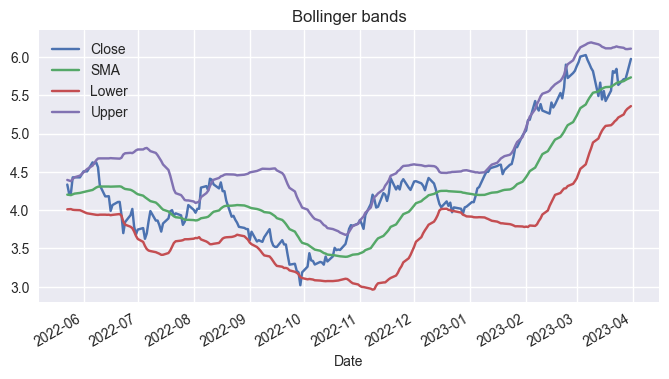

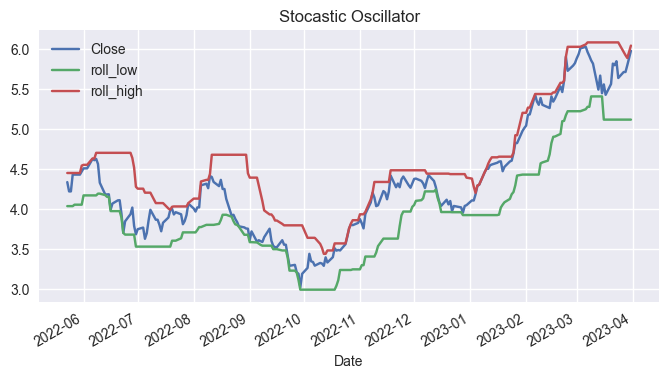

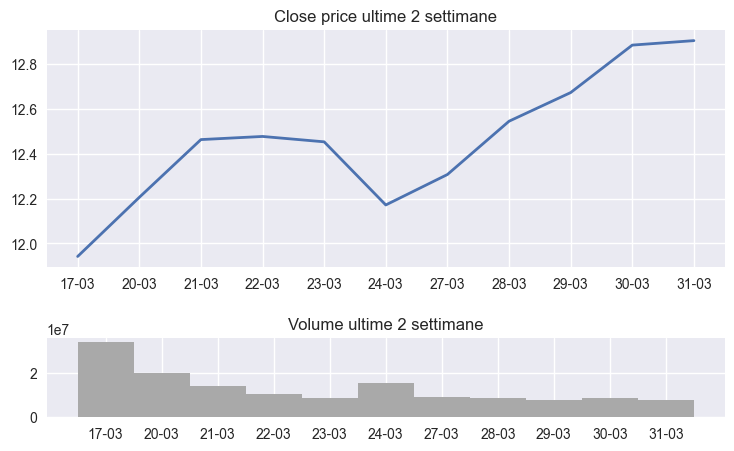

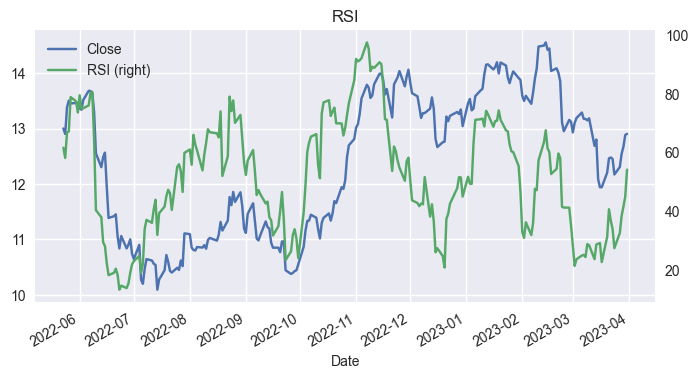

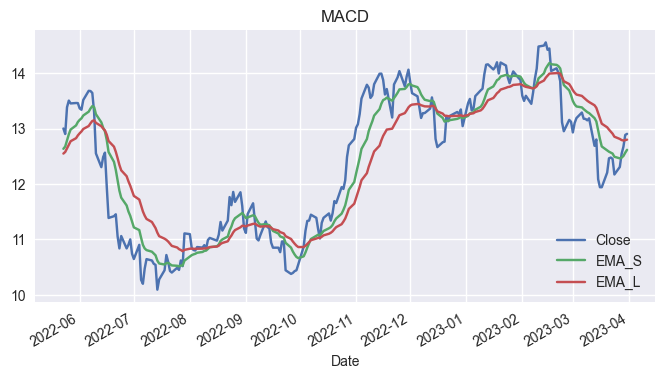

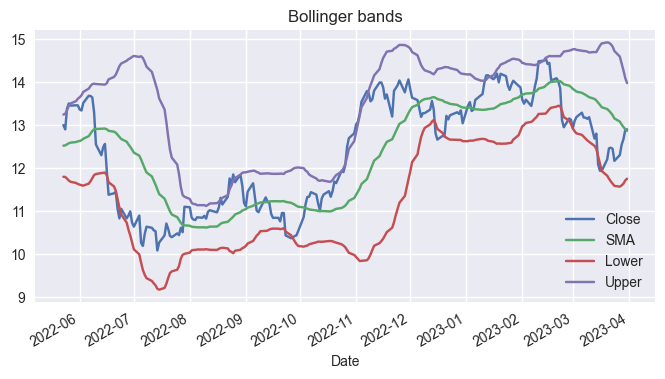

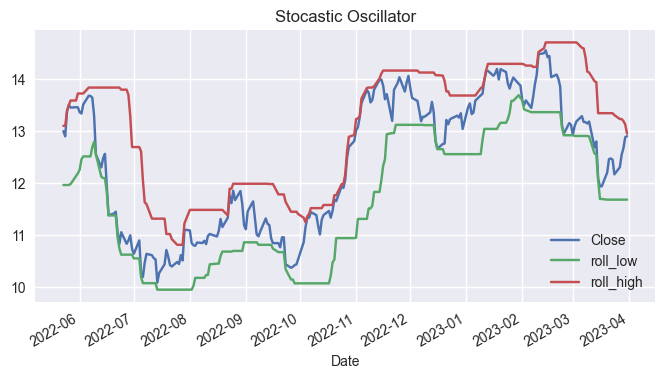

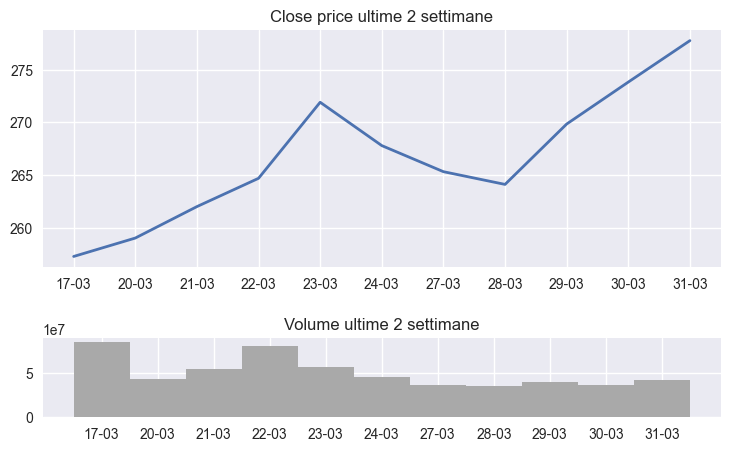

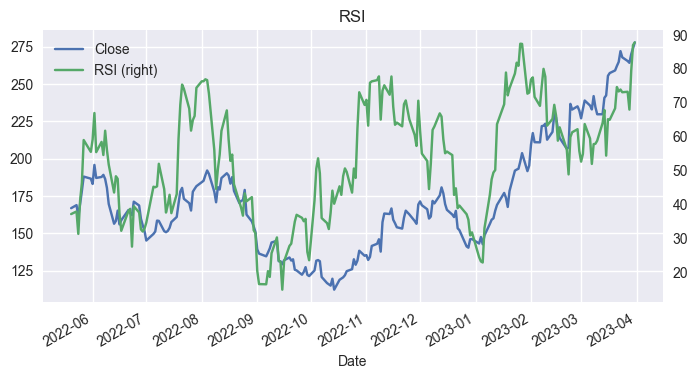

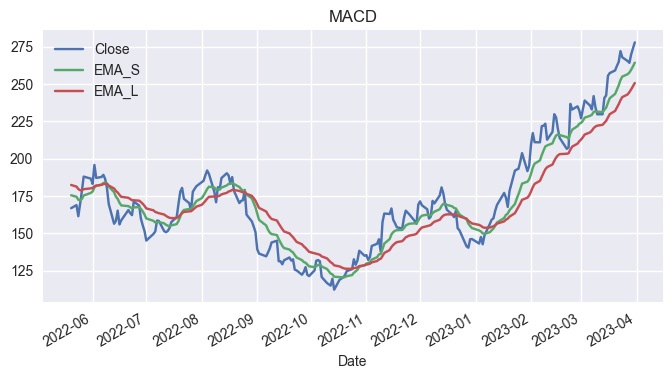

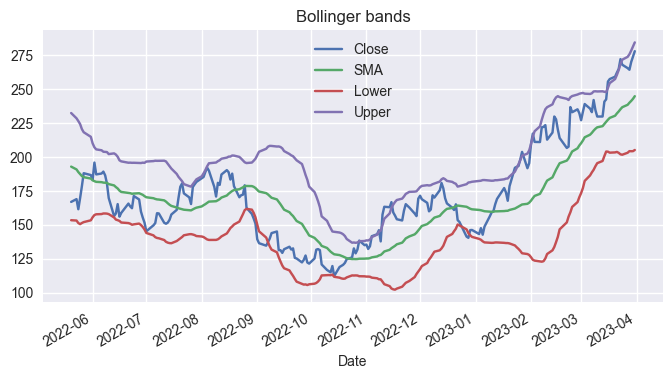

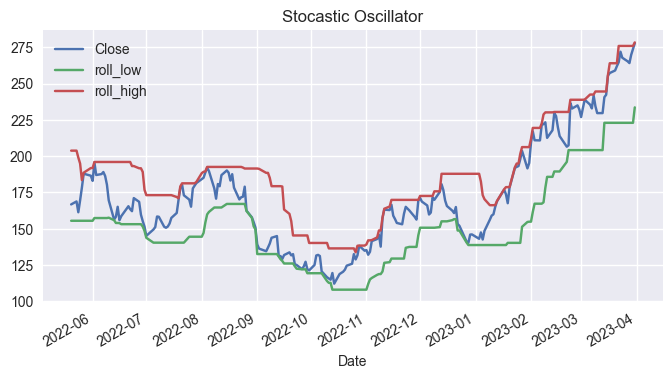

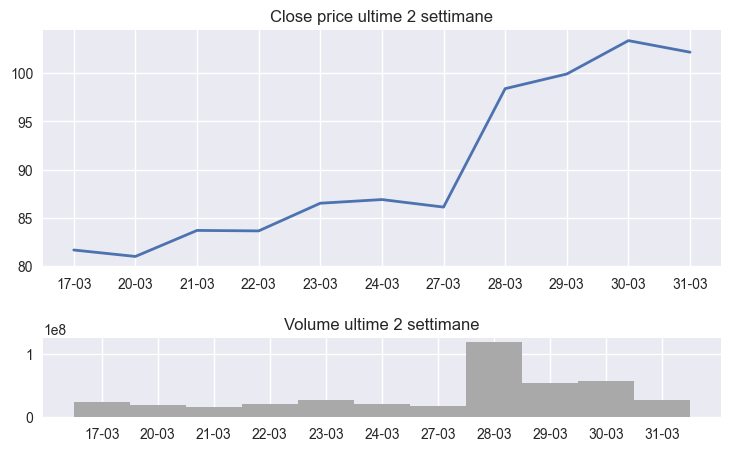

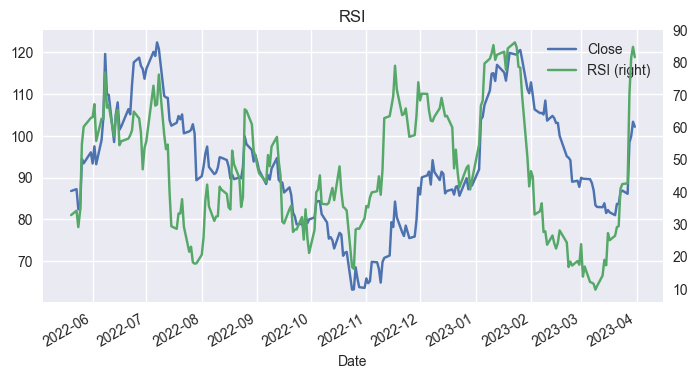

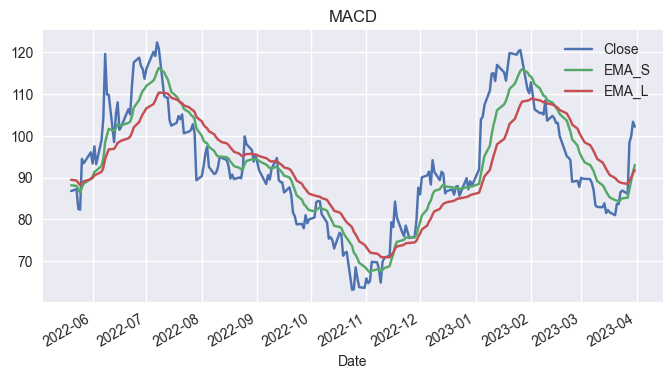

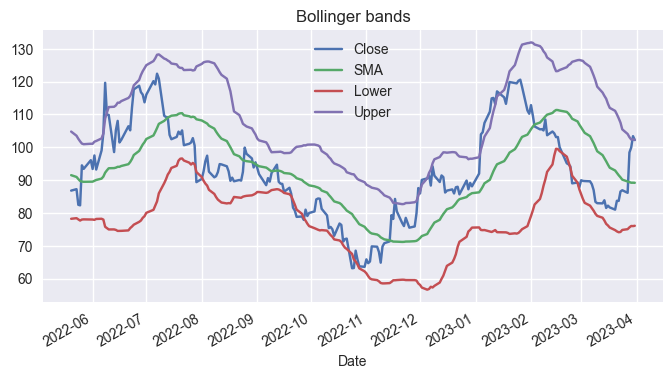

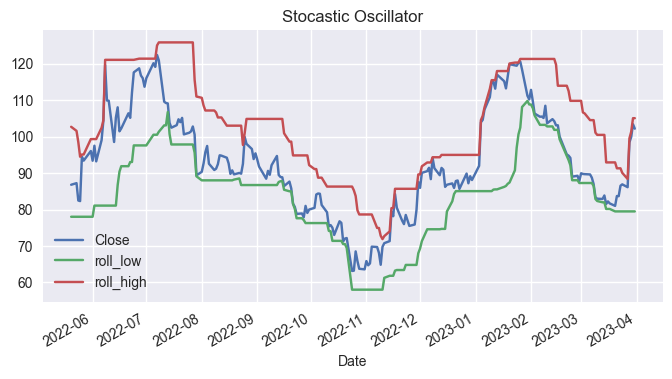

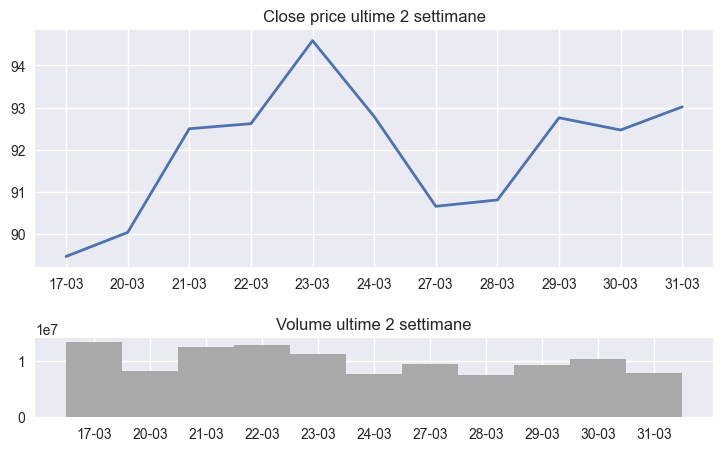

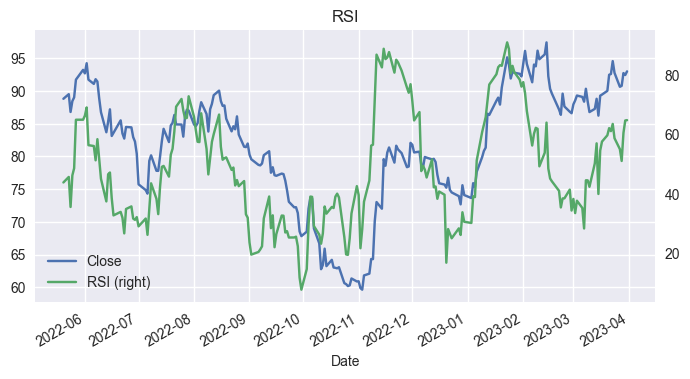

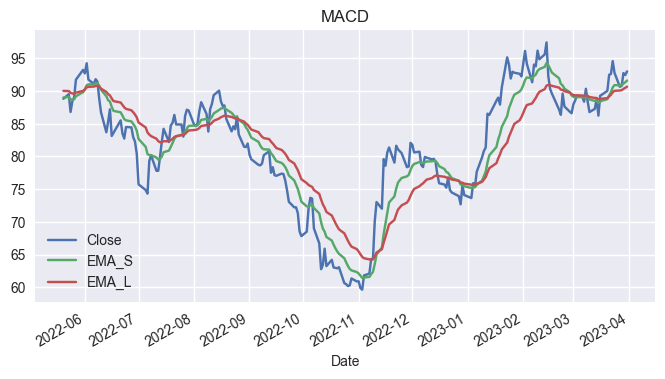

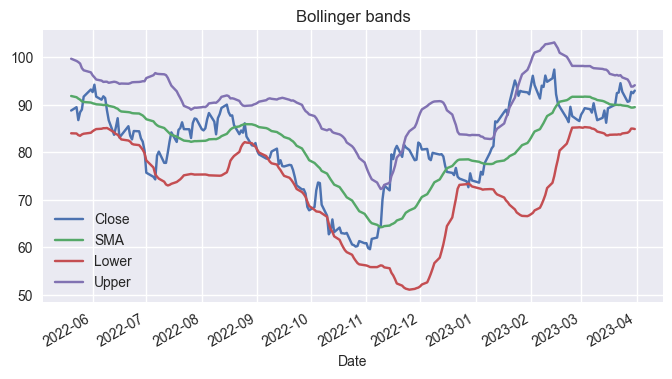

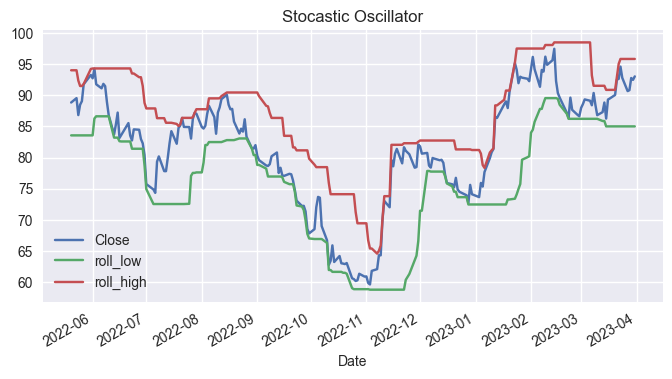

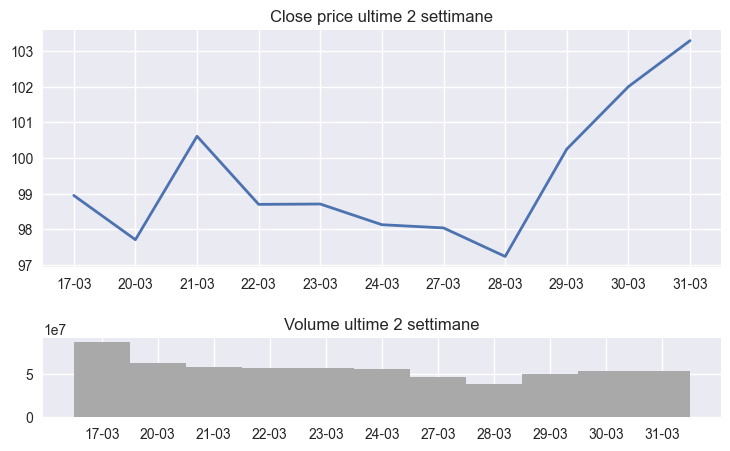

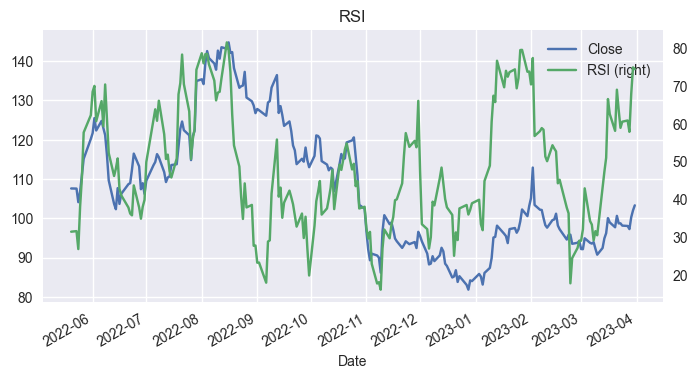

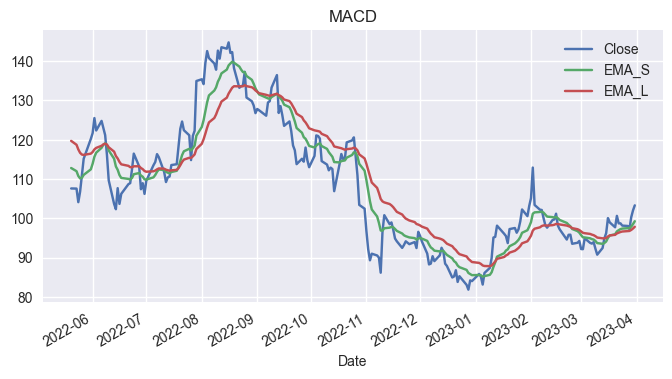

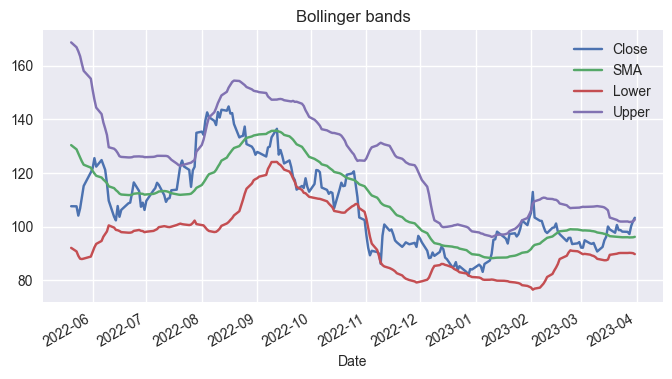

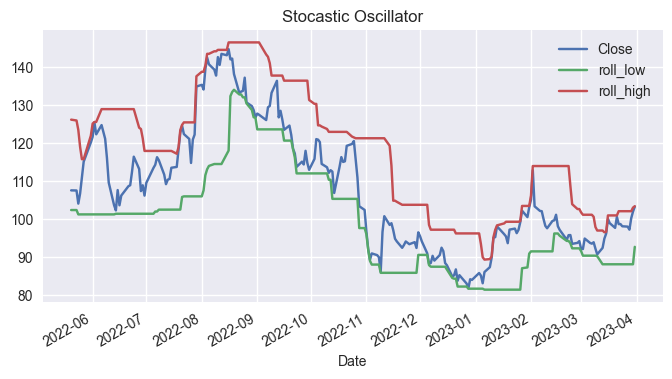

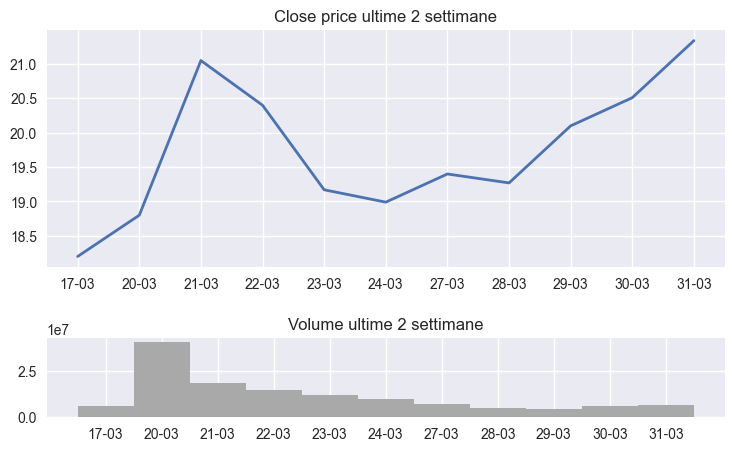

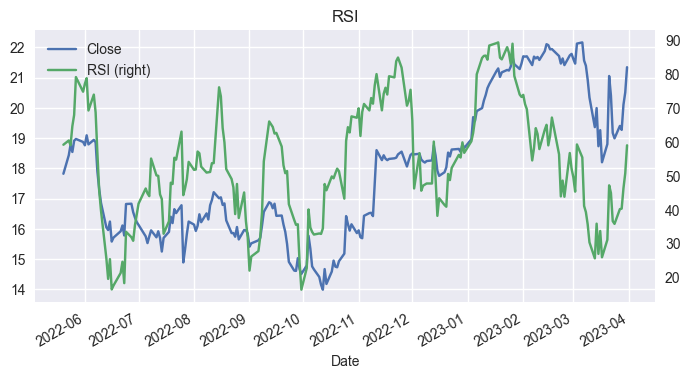

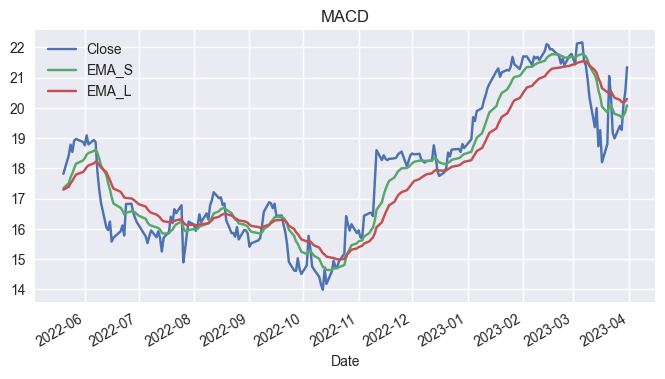

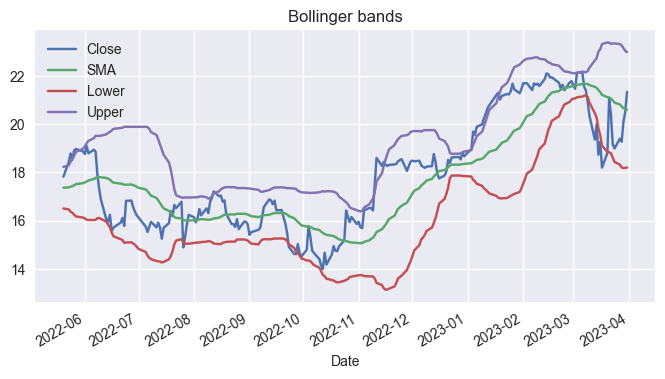

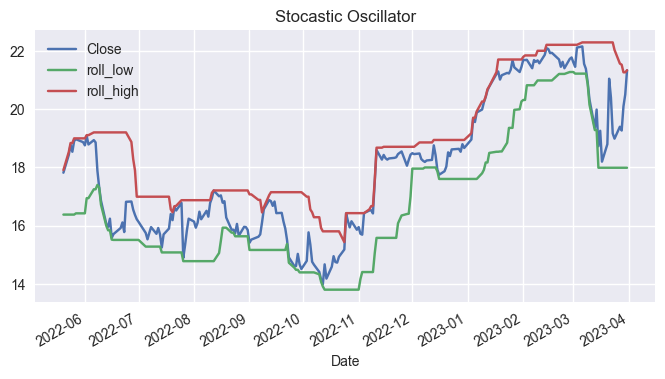

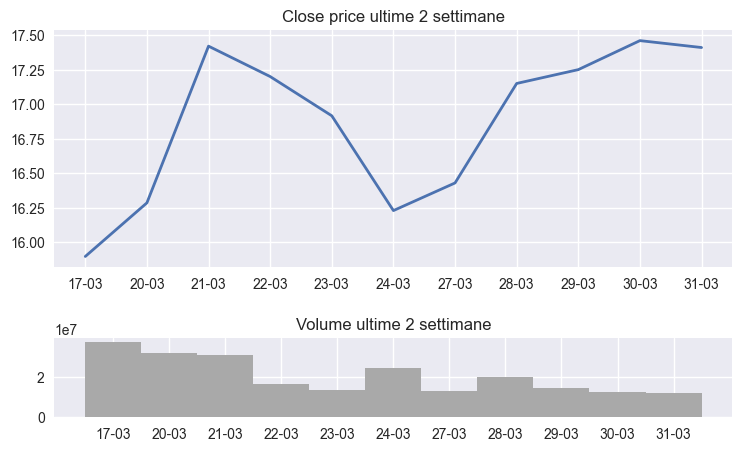

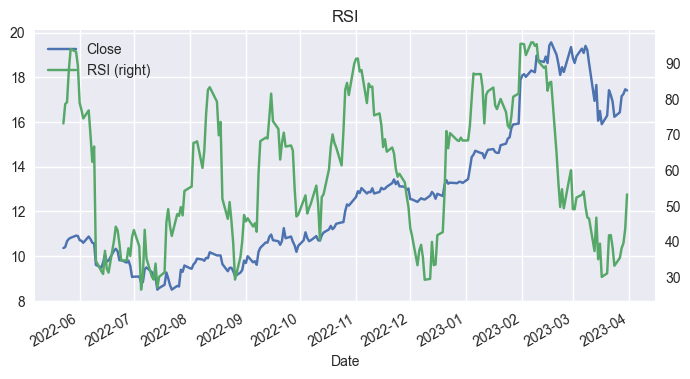

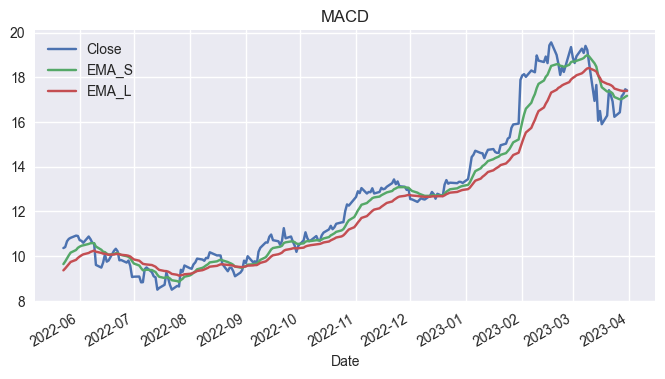

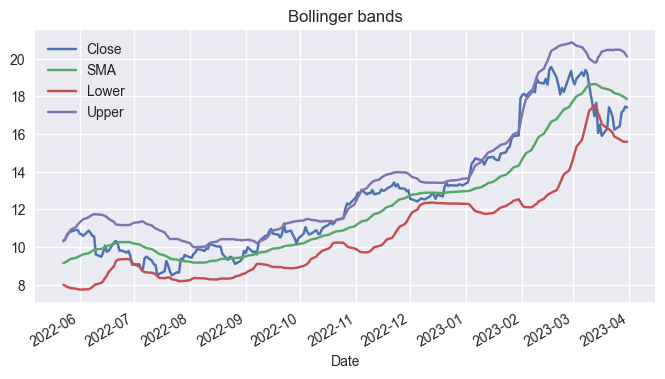

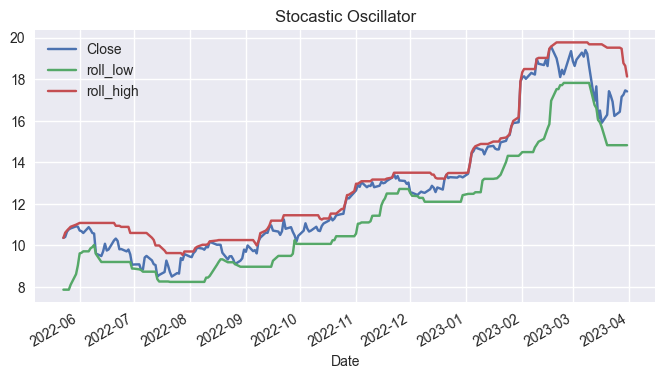

In [7]:
for stock in symbol:
    stock_info = Ticker(stock)
    print(stock)
    if stock != "TTM":
        name=stock_info.quotes[stock]['shortName']
    else:
        name = "Tatamotor"
    claudio_pred=compute_prediction_next_week(stock)
    data=stock_data[stock]
    data=rsi(data)
    data=bollinger_bands(data)
    data=ema(data)
    data=stocastic_oscillator(data)
    close_and_volume_price(stock)
    maximum_string=find_maximum(data)
    closing_price=data.tail(1).Close.item()
    print_string1=prophet_plot(stock)[0]
    print_string2=prophet_plot(stock)[1]
    data.dropna(inplace = True)
    data[["Close", "RSI"]].plot(figsize = (8,4), secondary_y = "RSI")
    plt.title("RSI")
    plt.savefig('rsi.png')

    data[['Close', 'EMA_S', 'EMA_L']].plot(figsize = (8, 4))
    plt.title("MACD")
    plt.savefig('ema.png')

    data[["Close","SMA","Lower", "Upper"]].plot(figsize = (8,4))
    plt.title("Bollinger bands")
    plt.savefig('bollingerbands.png')

    data[["Close", "roll_low", "roll_high"]].plot(figsize = (8,4))
    plt.title("Stocastic Oscillator")
    plt.savefig('stocastic.png')
    
    img1 = Image.open('rsi.png')
    img2 = Image.open('ema.png')
    img3 = Image.open('bollingerbands.png')
    img4 = Image.open('stocastic.png')
    img5 = Image.open('prophet.png')
    w1, h1 = img1.size
    w2, h2 = img2.size
    w3, h3 = img3.size
    w4, h4 = img4.size
    
    w = max(w1, w2, w3,w4)
    h = max(h1, h2, h3,h4)
    new_image = Image.new('RGB', (w*2, h*2))
    new_image.paste(img1, (0, 0))
    new_image.paste(img2, (w, 0))
    new_image.paste(img3, (0, h))
    new_image.paste(img4, (w, h))
    

    new_image.save(stock+".png")
    
    canvas = Canvas(stock+".pdf")
    canvas.setFont("Helvetica", 20)
    canvas.drawString(80,800, name)
    canvas.setFont("Helvetica", 10)
    canvas.drawImage(stock+".png",1,410,height=350,width=600)
    canvas.drawString(80,780,"Today closing price: "+str(round(closing_price,2)))
    canvas.drawString(80,765,maximum_string)
    canvas.drawImage('prophet.png',1,235,height=180,width=310)
    canvas.drawString(80,400,"Prophet Artificial Intelligence prevision")
    canvas.drawString(40,220,print_string1)
    canvas.drawString(40,200,print_string2)
    canvas.drawImage('closeandvolume.png',320,215,height=180,width=250)
    canvas.drawString(320,180,"Previsione machine learning prox sett: "+claudio_pred)
    canvas.save()

os.remove('rsi.png')
os.remove('ema.png')
os.remove('bollingerbands.png')
os.remove('stocastic.png')
os.remove('prophet.png')
os.remove('closeandvolume.png')




In [36]:
end = date.today()+timedelta(weeks=1)+timedelta(days=1)
start = end-timedelta(weeks=60)
data=yf.download("TSLA",start,end, auto_adjust=True,ignore_tz=True)
display(data)

[*********************100%***********************]  1 of 1 completed


Open     High      Low    Close     Volume
Date                                                     
2022-02-14 287.1900 299.6267 284.3833 291.9200   67756500
2022-02-15 300.0000 307.6667 297.7933 307.4767   57286200
2022-02-16 304.6833 308.8100 300.4033 307.7967   51294300
2022-02-17 304.4200 306.1667 291.3667 292.1167   55178400
2022-02-18 295.3333 295.6233 279.2033 285.6600   68501700
...             ...      ...      ...      ...        ...
2023-03-27 194.4200 197.3900 189.9400 191.8100  120851600
2023-03-28 192.0000 192.3500 185.4300 189.1900   98654600
2023-03-29 193.1300 195.2900 189.4400 193.8800  123660000
2023-03-30 195.5800 197.3300 194.4200 195.2800  110252200
2023-03-31 197.5300 207.7900 197.2300 207.4600  169272334

[284 rows x 5 columns]

In [49]:
quote_table = si.get_quote_table("aapl", dict_result=False)
quote_table

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/yahoo_fin/stock_info.py:295: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/yahoo_fin/stock_info.py:302: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



attribute                        value
0              1y Target Est                     169.2300
1              52 Week Range              124.17 - 179.61
2                        Ask                 160.03 x 800
3                Avg. Volume                70658500.0000
4          Beta (5Y Monthly)                       1.3000
5                        Bid                 160.20 x 800
6                Day's Range              157.85 - 160.34
7                  EPS (TTM)                       5.9500
8              Earnings Date  Apr 26, 2023 - May 01, 2023
9           Ex-Dividend Date                 Feb 10, 2023
10  Forward Dividend & Yield                 0.92 (0.58%)
11                Market Cap                       2.535T
12                      Open                     158.8600
13            PE Ratio (TTM)                      26.9300
14            Previous Close                     158.9300
15               Quote Price                     160.2500
16                    Volume                59256343.0000

In [ ]:
aapl = Ticker('TSLA')
aapl.income_statement()



In [ ]:
df=si.get_analysts_info('aapl')

In [ ]:
df['Earnings History']

In [ ]:
end = date.today()+timedelta(weeks=1)
start = end-timedelta(weeks=52*1)
data= yf.download("MSFT",start,end, auto_adjust=True,ignore_tz=True).reset_index()

In [ ]:
data[["Close"]].plot(figsize = (8,4))
data

In [ ]:
data= yf.download("AAPL",start,end, auto_adjust=True,ignore_tz=True).reset_index()

In [ ]:
forecast.columns

In [8]:

    end = date.today()+timedelta(weeks=1)+timedelta(days=1)
    start = end-timedelta(weeks=60)
    data=yf.download(symbol,start,end, auto_adjust=True,ignore_tz=True)
    data['log_return'] = np.log(data.Close.div(data.Close.shift(1)))
    dictionary={}
    weeks = [g for n, g in data.groupby(pd.Grouper(freq='W'))]
    for week in weeks:
        week_return=week.Close[-1] / week.Close[0]
        std = week['log_return'].std()
        volume_change=week.Volume[-1]/week.Volume[0]
        dictionary[week.iloc[:1].index.item()]=[stock,std,week_return,volume_change]
        data=pd.DataFrame.from_dict(dictionary, orient='index',columns=['stock','std','week_return','volume_change'])
    data = data.rename(columns = {'index':'month_year'})
    data['week_return_future'] =data['week_return'].shift(-1)
    data['position']=data['week_return_future'].apply(lambda x: 1 if x>1 else 0)  
    data = data.tail(-1).copy()
    data=data.dropna()
    x_cols = ['std', 'week_return','volume_change']
    X = data.loc[:, x_cols]
    y = data.position
    X_to_pred=data.tail(2).loc[:, x_cols].head(1)
    sum_y=0   
    for name, clf in zip(names, classifiers):
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X, y)
        y_pred = clf.predict(X)
        y_pred = clf.predict(X_to_pred).item()
        sum_y=sum_y+y_pred          


[*********************100%***********************]  14 of 14 completed


ValueError: Cannot set a DataFrame with multiple columns to the single column log_return

In [ ]:
import sys
!{sys.executable} -m pip install plotly

In [23]:
def compute_prediction_next_week(stocktopredict):

    end = date.today()+timedelta(weeks=1)+timedelta(days=3)
    start = end-timedelta(weeks=60)
    data=yf.download(stock,start,end, auto_adjust=True,ignore_tz=True)
    data['log_return'] = np.log(data.Close.div(data.Close.shift(1)))
    dictionary={}
    weeks = [g for n, g in data.groupby(pd.Grouper(freq='W'))]
    for week in weeks:
        week_return=week.Close[-1] / week.Close[0]
        std = week['log_return'].std()
        volume_change=week.Volume[-1]/week.Volume[0]
        dictionary[week.iloc[:1].index.item()]=[stock,std,week_return,volume_change]
        data=pd.DataFrame.from_dict(dictionary, orient='index',columns=['stock','std','week_return','volume_change'])
    data = data.rename(columns = {'index':'month_year'})
    data['week_return_future'] =data['week_return'].shift(-1)
    data['position']=data['week_return_future'].apply(lambda x: 1 if x>1 else 0)  
    data = data.tail(-1).copy()
    display(data)
    x_cols = ['std', 'week_return','volume_change']
    X = data.loc[:, x_cols]
    y = data.position
    display(X)
    X_to_pred=data.tail(1).loc[:, x_cols].head(1)
    print(X_to_pred)
    sum_y=0   
    for name, clf in zip(names, classifiers):
        y_pred = clf.predict(X_to_pred).item()
        sum_y=sum_y+y_pred          
    if sum_y==10:
        return "buy"
    if sum_y==0:
        return "sell"
    else:
        return "hold"
    

In [24]:
claudio_pred=compute_prediction_next_week("TSLA")

[*********************100%***********************]  1 of 1 completed


stock    std  week_return  volume_change  week_return_future  \
2022-02-21  UCG.MI 0.0683       0.8751         3.2537              0.7903   
2022-02-28  UCG.MI 0.0684       0.7903         1.2435              1.0881   
2022-03-07  UCG.MI 0.0783       1.0881         0.6733              1.0147   
2022-03-14  UCG.MI 0.0402       1.0147         0.9712              0.9831   
2022-03-21  UCG.MI 0.0169       0.9831         0.8207              1.0451   
2022-03-28  UCG.MI 0.0388       1.0451         0.8172              0.9730   
2022-04-04  UCG.MI 0.0228       0.9730         0.9981              0.9888   
2022-04-11  UCG.MI 0.0256       0.9888         0.8674              0.9958   
2022-04-19  UCG.MI 0.0203       0.9958         1.0332              0.9744   
2022-04-25  UCG.MI 0.0188       0.9744         1.3663              0.9503   
2022-05-02  UCG.MI 0.0251       0.9503         1.4750              1.2088   
2022-05-09  UCG.MI 0.0487       1.2088         0.6651              1.0281   
2022-05-16  UCG.MI 0.0144       1.0281         1.2028              1.0442   
2022-05-23  UCG.MI 0.0159       1.0442         0.9777              0.9707   
2022-05-30  UCG.MI 0.0096       0.9707         0.8614              0.8832   
2022-06-06  UCG.MI 0.0453       0.8832         3.5709              1.0334   
2022-06-13  UCG.MI 0.0278       1.0334         1.0122              0.9597   
2022-06-20  UCG.MI 0.0304       0.9597         1.7727              0.9351   
2022-06-27  UCG.MI 0.0249       0.9351         1.4538              1.0447   
2022-07-04  UCG.MI 0.0338       1.0447         1.0573              0.9242   
2022-07-11  UCG.MI 0.0271       0.9242         1.3621              0.9751   
2022-07-18  UCG.MI 0.0404       0.9751         2.1755              1.1052   
2022-07-25  UCG.MI 0.0367       1.1052         1.0575              1.0452   
2022-08-01  UCG.MI 0.0139       1.0452         0.9430              1.0331   
2022-08-08  UCG.MI 0.0138       1.0331         1.1220              0.9616   
2022-08-16  UCG.MI 0.0182       0.9616         1.1779              0.9760   
2022-08-22  UCG.MI 0.0200       0.9760         0.7927              1.0790   
2022-08-29  UCG.MI 0.0206       1.0790         1.0764              1.0667   
2022-09-05  UCG.MI 0.0336       1.0667         1.9311              1.0094   
2022-09-12  UCG.MI 0.0196       1.0094         2.1611              1.0126   
2022-09-19  UCG.MI 0.0349       1.0126         2.4443              0.9616   
2022-09-26  UCG.MI 0.0223       0.9616         1.0244              1.0000   
2022-10-03  UCG.MI 0.0237       1.0000         0.7466              1.0143   
2022-10-10  UCG.MI 0.0159       1.0143         1.5294              1.0225   
2022-10-17  UCG.MI 0.0117       1.0225         1.0562              1.0652   
2022-10-24  UCG.MI 0.0192       1.0652         0.7886              1.0394   
2022-10-31  UCG.MI 0.0120       1.0394         0.8268              1.0000   
2022-11-07  UCG.MI 0.0144       1.0000         0.6097              1.0180   
2022-11-14  UCG.MI 0.0070       1.0180         2.0751              0.9894   
2022-11-21  UCG.MI 0.0151       0.9894         1.0169              0.9569   
2022-11-28  UCG.MI 0.0166       0.9569         1.1166              1.0085   
2022-12-05  UCG.MI 0.0066       1.0085         2.6893              1.0068   
2022-12-12  UCG.MI 0.0150       1.0068         1.7594              1.0471   
2022-12-19  UCG.MI 0.0208       1.0471         1.0903              1.0008   
2022-12-27  UCG.MI 0.0034       1.0008         0.7482              1.0942   
2023-01-02  UCG.MI 0.0137       1.0942         2.0023              1.0097   
2023-01-09  UCG.MI 0.0123       1.0097         0.9438              1.0115   
2023-01-16  UCG.MI 0.0120       1.0115         1.7762              1.0571   
2023-01-23  UCG.MI 0.0097       1.0571         1.7485              1.1314   
2023-01-30  UCG.MI 0.0511       1.1314         1.0986              1.0240   
2023-02-06  UCG.MI 0.0208       1.0240         0.9067              1.0470   
2023-02-1

std  week_return  volume_change
2022-02-21 0.0683       0.8751         3.2537
2022-02-28 0.0684       0.7903         1.2435
2022-03-07 0.0783       1.0881         0.6733
2022-03-14 0.0402       1.0147         0.9712
2022-03-21 0.0169       0.9831         0.8207
2022-03-28 0.0388       1.0451         0.8172
2022-04-04 0.0228       0.9730         0.9981
2022-04-11 0.0256       0.9888         0.8674
2022-04-19 0.0203       0.9958         1.0332
2022-04-25 0.0188       0.9744         1.3663
2022-05-02 0.0251       0.9503         1.4750
2022-05-09 0.0487       1.2088         0.6651
2022-05-16 0.0144       1.0281         1.2028
2022-05-23 0.0159       1.0442         0.9777
2022-05-30 0.0096       0.9707         0.8614
2022-06-06 0.0453       0.8832         3.5709
2022-06-13 0.0278       1.0334         1.0122
2022-06-20 0.0304       0.9597         1.7727
2022-06-27 0.0249       0.9351         1.4538
2022-07-04 0.0338       1.0447         1.0573
2022-07-11 0.0271       0.9242         1.3621
2022-07-18 0.0404       0.9751         2.1755
2022-07-25 0.0367       1.1052         1.0575
2022-08-01 0.0139       1.0452         0.9430
2022-08-08 0.0138       1.0331         1.1220
2022-08-16 0.0182       0.9616         1.1779
2022-08-22 0.0200       0.9760         0.7927
2022-08-29 0.0206       1.0790         1.0764
2022-09-05 0.0336       1.0667         1.9311
2022-09-12 0.0196       1.0094         2.1611
2022-09-19 0.0349       1.0126         2.4443
2022-09-26 0.0223       0.9616         1.0244
2022-10-03 0.0237       1.0000         0.7466
2022-10-10 0.0159       1.0143         1.5294
2022-10-17 0.0117       1.0225         1.0562
2022-10-24 0.0192       1.0652         0.7886
2022-10-31 0.0120       1.0394         0.8268
2022-11-07 0.0144       1.0000         0.6097
2022-11-14 0.0070       1.0180         2.0751
2022-11-21 0.0151       0.9894         1.0169
2022-11-28 0.0166       0.9569         1.1166
2022-12-05 0.0066       1.0085         2.6893
2022-12-12 0.0150       1.0068         1.7594
2022-12-19 0.0208       1.0471         1.0903
2022-12-27 0.0034       1.0008         0.7482
2023-01-02 0.0137       1.0942         2.0023
2023-01-09 0.0123       1.0097         0.9438
2023-01-16 0.0120       1.0115         1.7762
2023-01-23 0.0097       1.0571         1.7485
2023-01-30 0.0511       1.1314         1.0986
2023-02-06 0.0208       1.0240         0.9067
2023-02-13 0.0215       1.0470         1.2896
2023-02-20 0.0196       0.9598         2.1050
2023-02-27 0.0273       0.9927         0.5418
2023-03-06 0.0208       0.9659         2.6945
2023-03-13 0.0646       0.9384         0.8525
2023-03-20 0.0424       0.9966         0.7593
2023-03-27 0.0173       1.0596         0.9435

              std  week_return  volume_change
2023-03-27 0.0173       1.0596         0.9435


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but GaussianProcessClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/Library/Frameworks/Python.framework/Versions/3.11/l